# Decesion Tree


In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("D:\\data_csv.csv")
print(data.head())

   CASE_NO_PATIENT'S  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0                  1   0   0   0   0   0   0   1   1   0  ...   
1                  2   1   1   0   0   0   1   1   0   0  ...   
2                  3   1   0   0   0   0   0   1   1   0  ...   
3                  4   1   1   1   1   1   1   1   1   1  ...   
4                  5   1   1   0   1   1   1   1   1   1  ...   

   Global developmental delay/intellectual disability  \
0                                                Yes    
1                                                Yes    
2                                                Yes    
3                                                Yes    
4                                                Yes    

   Social/Behavioural Issues  Childhood Autism Rating Scale  Anxiety_disorder  \
0                        Yes                              1               Yes   
1                        Yes                              2               Yes   
2                      

In [24]:
print(data.dtypes)

CASE_NO_PATIENT'S                                       int64
A1                                                      int64
A2                                                      int64
A3                                                      int64
A4                                                      int64
A5                                                      int64
A6                                                      int64
A7                                                      int64
A8                                                      int64
A9                                                      int64
A10_Autism_Spectrum_Quotient                            int64
Social_Responsiveness_Scale                           float64
Age_Years                                               int64
Qchat_10_Score                                        float64
Speech Delay/Language Disorder                         object
Learning disorder                                      object
Genetic_

In [25]:
# Dropping the 'CASE_NO_PATIENT'S' column
column_to_drop = "CASE_NO_PATIENT'S"
data = data.drop(columns=[column_to_drop])

In [26]:
print(data.head())

   A1  A2  A3  A4  A5  A6  A7  A8  A9  A10_Autism_Spectrum_Quotient  ...  \
0   0   0   0   0   0   0   1   1   0                             1  ...   
1   1   1   0   0   0   1   1   0   0                             0  ...   
2   1   0   0   0   0   0   1   1   0                             1  ...   
3   1   1   1   1   1   1   1   1   1                             1  ...   
4   1   1   0   1   1   1   1   1   1                             1  ...   

   Global developmental delay/intellectual disability  \
0                                                Yes    
1                                                Yes    
2                                                Yes    
3                                                Yes    
4                                                Yes    

   Social/Behavioural Issues  Childhood Autism Rating Scale Anxiety_disorder  \
0                        Yes                              1              Yes   
1                        Yes            

In [27]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=model.fit_transform(data[i])

In [28]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,...,1,1,1,1,0,13,1,0,0,0
1,1,1,0,0,0,1,1,0,0,0,...,1,1,2,1,1,10,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,...,1,1,4,1,1,4,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,2,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,0,10,0,0,0,1


In [29]:
x=data.drop("ASD_traits",axis=1)
y=data["ASD_traits"]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


np.random.seed(65)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf = DecisionTreeClassifier(criterion="gini",min_samples_split=2)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(f"Model Accuracy on Test Data = {score*100:.2f}%")

Model Accuracy on Test Data = 99.24%


# Model Evaluation

Metrics Used for Model Evaluation
   a)Classification Report
   b)Confusion Matrix
   c)Accuracy Score

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

y_preds = clf.predict(x_test)
print(f"Classfication Report:\n\n{classification_report(y_test,y_preds)}")

Classfication Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       174
           1       0.99      1.00      0.99       223

    accuracy                           0.99       397
   macro avg       0.99      0.99      0.99       397
weighted avg       0.99      0.99      0.99       397



In [32]:
cf_matrix = confusion_matrix(y_test, y_preds)
print(f"Confusion Matrix:\n\n{cf_matrix}")

Confusion Matrix:

[[172   2]
 [  1 222]]


Visualizing Confusion Matrix

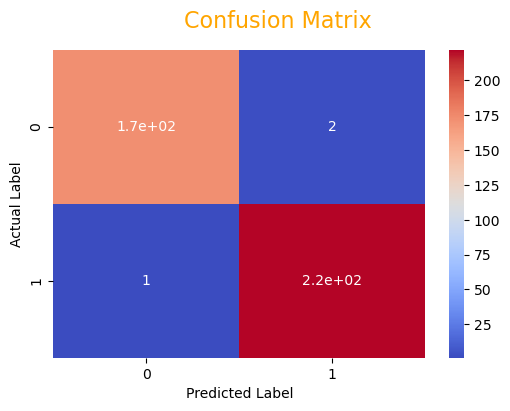

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')
fig.suptitle(t="Confusion Matrix",
            color="orange",
            fontsize=16);
ax.set(xlabel="Predicted Label",
      ylabel="Actual Label");

In [34]:
print(f"Accuracy Score: \n\n{accuracy_score(y_test, y_preds)*100:.2f}%")

Accuracy Score: 

99.24%


In [35]:
from sklearn import tree

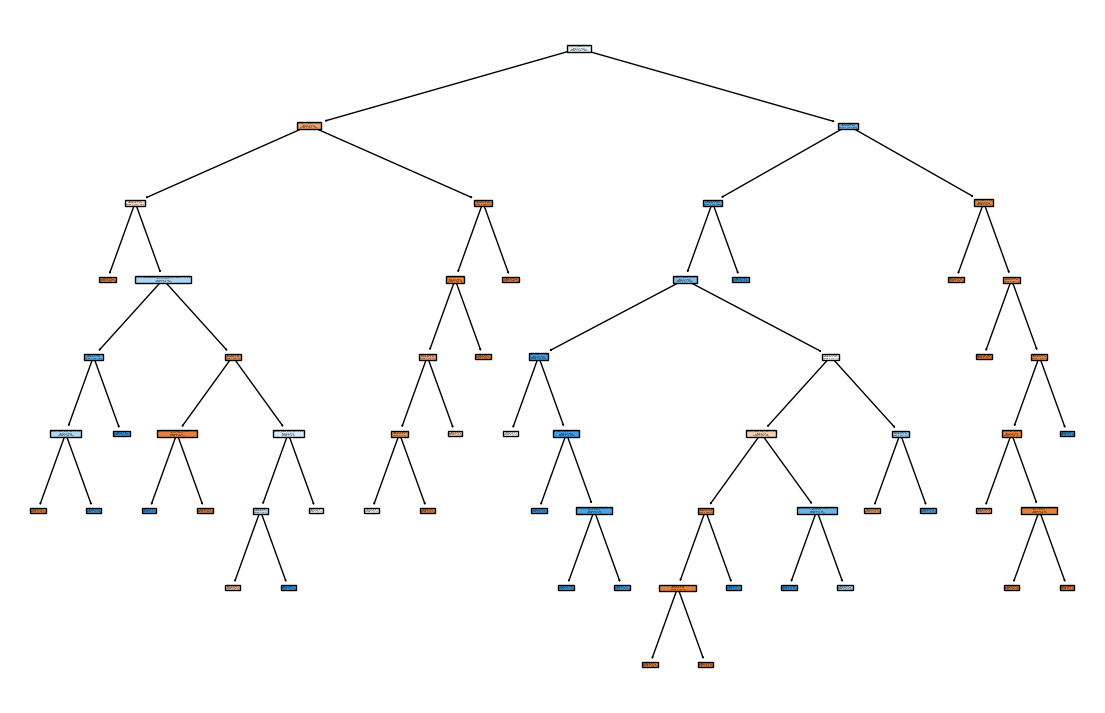

In [36]:
plt.figure(figsize=(14,9))
tree.plot_tree(clf,filled=True, feature_names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10_Autism_Spectrum_Quotient','Social_Responsiveness_Scale','Age_Years','Qchat_10_Score','Speech Delay/Language Disorder','Learning disorder','Genetic_Disorders','Depression','Global developmental delay/intellectual disability','Social/Behavioural Issues','Childhood Autism Rating Scale','Anxiety_disorder','Sex','Ethnicity','Jaundice','Family_mem_with_ASD','Who_completed_the_test']);